In [1]:
#data manipulation
import numpy as np
import pandas as pd

#ploting
import matplotlib.pyplot as plt
import seaborn as sns

#statistical modeling
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from datetime import datetime
from watermark import watermark
print(watermark(packages="numpy, pandas,matplotlib, seaborn,scipy,statsmodels"))

numpy      : 1.24.3
 pandas    : not installed
matplotlib : 3.7.2
 seaborn   : not installed
scipy      : 1.11.1
statsmodels: 0.14.0



In [2]:
df = pd.read_csv('/Users/stevekim/Desktop/BrainStationSprintProject/EVChargingStationUsageCali.csv')

/var/folders/xm/6l5vh0t50td0sdk__7s1xptc0000gn/T/ipykernel_77218/927276920.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/stevekim/Desktop/BrainStationSprintProject/EVChargingStationUsageCali.csv')


In [3]:
print(df.head())

                 Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/29/2011 23:20                   3:03:32   
1                  7

In [4]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

Column names are too long keep it short and neat

In [5]:
df.rename(columns={'Energy (kWh)' : 'Energy', 'GHG Savings (kg)': "GreenHouseGasSave",
                  'Transaction Date (Pacific Time)':'Transaction Date',
                   'Charging Time (hh:mm:ss)':'Charging Time',
                   'Total Duration (hh:mm:ss)': 'Total Duration',
                   'Gasoline Savings (gallons)': 'Gasoline Savings'
                  }, inplace=True)
print(df.columns)

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date',
       'Total Duration', 'Charging Time', 'Energy', 'GreenHouseGasSave',
       'Gasoline Savings', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID',
       'Address 1', 'City', 'State/Province', 'Postal Code', 'Country',
       'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')


In [6]:
df.head()
#MAC stands for Media Access Control address, MAC addresses are used as a way to uniquely identify a device on a network at the data link layer of the OSI model

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date,Total Duration,Charging Time,...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Station Name        259415 non-null  object 
 1   MAC Address         259415 non-null  object 
 2   Org Name            259415 non-null  object 
 3   Start Date          259415 non-null  object 
 4   Start Time Zone     259415 non-null  object 
 5   End Date            259415 non-null  object 
 6   End Time Zone       259415 non-null  object 
 7   Transaction Date    259206 non-null  object 
 8   Total Duration      259415 non-null  object 
 9   Charging Time       259415 non-null  object 
 10  Energy              259415 non-null  float64
 11  GreenHouseGasSave   259415 non-null  float64
 12  Gasoline Savings    259415 non-null  float64
 13  Port Type           259406 non-null  object 
 14  Port Number         259415 non-null  int64  
 15  Plug Type           259415 non-nul

In [8]:
df = df.drop(columns=['Country','State/Province','Currency'])

Drop columns:
Start Time Zone, End Time Zone. Report base on PDT no need to included in column
Country, State/Province. Report is base on California State no need to include country and state
Currency. No need to include currency 

In [9]:
#Write an utility function to perform basic data quality checks

def basic_check(df):
    """
    should return Number of rows, Number of columns, Missing values,
    Duplicated columns, Duplicated rows
    """
    
    #take a look at the shape of dataset
    print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')
    
    #take a look at the unique datatypes:
    print(f'Unique datatypes: {list(df.dtypes.unique())}')
    
    #check for missing values
    print(f'Missing values: {df.isnull().sum().any()}')
    
    #check for duplicates
    print(f'Duplicated columns: {df.T.duplicated().any()}')
    
    #row-level duplicates
    print(f'Duplicated rows: {df.duplicated().any()}')

In [10]:
basic_check(df)

There are 259415 rows and 30 columns in the dataset.
Unique datatypes: [dtype('O'), dtype('float64'), dtype('int64')]
Missing values: True
Duplicated columns: False
Duplicated rows: True


In [11]:
df.describe().T
#Univartriate Analysis
#This dataset contains only numerical values
#Summary statistic

,count,mean,std,min,25%,50%,75%,max
Energy,259415.0,8.544277e+00,7.185462e+00,1.000000e-02,3.784000e+00,6.868634e+00,1.145834e+01,9.736000e+01
GreenHouseGasSave,259415.0,3.588596e+00,3.017894e+00,4.000000e-03,1.589000e+00,2.885000e+00,4.813000e+00,4.089100e+01
Gasoline Savings,259415.0,1.072306e+00,9.017761e-01,1.000000e-03,4.750000e-01,8.620000e-01,1.438000e+00,1.221900e+01
Port Number,259415.0,1.591627e+00,4.915337e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
EVSE ID,180467.0,1.462973e+05,2.429677e+05,3.792000e+03,4.358300e+04,1.074270e+05,1.745590e+05,5.535441e+06
Postal Code,259415.0,9.430232e+04,1.941657e+00,9.430100e+04,9.430100e+04,9.430100e+04,9.430300e+04,9.430600e+04
Latitude,259415.0,3.743956e+01,9.621170e-03,3.742210e+01,3.742832e+01,3.744449e+01,3.744661e+01,3.744938e+01
Longitude,259415.0,-1.221513e+02,1.538203e-02,-1.221632e+02,-1.221622e+02,-1.221583e+02,-1.221457e+02,-1.221125e+02
Fee,259415.0,1.097481e+00,1.934408e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.640000e+00,8.456000e+01
Plug In Event Id,259415.0,1.188685e+08,4.057750e+08,1.000000e+00,1.573000e+03,3.573000e+03,6.340000e+03,1.609436e+09


In [12]:
df['Station Name'] = df['Station Name'].str.replace('PALO ALTO CA /','')
df['Station Name'].value_counts()

Station Name
 HAMILTON #2        23721
 HAMILTON #1        14888
 WEBSTER #1         14432
 BRYANT #2          14389
 HIGH #4            13898
 BRYANT #1          13436
 WEBSTER #2         12669
 CAMBRIDGE #1       11163
 HIGH #1            10756
 WEBSTER #3         10484
 TED THOMPSON #1     9814
 CAMBRIDGE #2        9256
 MPL #6              8996
 HIGH #3             8317
 MPL #4              7787
 MPL #5              7544
 HIGH #2             6930
 RINCONADA LIB 3     6499
 RINCONADA LIB 1     6212
 BRYANT #6           5857
 RINCONADA LIB 2     5553
 BRYANT #5           5332
 CAMBRIDGE #5        4556
 CAMBRIDGE #3        4476
 BRYANT #3           4475
 BRYANT #4           3598
 CAMBRIDGE #4        3428
 TED THOMPSON #3     2455
 TED THOMPSON #4     2226
 TED THOMPSON #2     2217
 MPL #2              1535
 MPL #3              1420
 MPL #1              1044
 BRYANT # 1            13
 SHERMAN 3              8
 SHERMAN 1              7
 SHERMAN 2              4
 SHERMAN 4              4

In [13]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date',
       'Total Duration', 'Charging Time', 'Energy', 'GreenHouseGasSave',
       'Gasoline Savings', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID',
       'Address 1', 'City', 'Postal Code', 'Latitude', 'Longitude', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'County', 'System S/N', 'Model Number'],
      dtype='object')

In [14]:
df['Station Name'] = df['Station Name'].replace({'BRYANT # 1': 'BRYANT #1'})

In [15]:

#Convert columns TotalDuration and charging time to seconds

df['Total Duration'] = pd.to_timedelta(df['Total Duration']).dt.total_seconds()
df['Charging Time'] = pd.to_timedelta(df['Charging Time']).dt.total_seconds()
df['TimeAfterCharged'] = (df['Total Duration'] - df['Charging Time']) / 60



In [16]:
df.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date,Total Duration,Charging Time,...,Longitude,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,TimeAfterCharged
0,HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,11012.0,6843.0,...,-122.160309,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN,69.483333
1,HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,126.0,114.0,...,-122.160309,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN,0.200000
2,HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,15452.0,15448.0,...,-122.160309,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN,0.066667
3,HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,7404.0,7378.0,...,-122.160309,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN,0.433333
4,HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,4284.0,2634.0,...,-122.160309,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN,27.500000


In [17]:
df['Postal Code'].value_counts()

Postal Code
94301    163195
94306     49630
94303     46590
Name: count, dtype: int64

In [18]:
df['Address 1'].value_counts()

Address 1
250 Hamilton Ave       38609
528 High St            37836
3700 Middlefield Rd    28326
520 Webster St         25173
445 Bryant St          24323
Bryant St              22777
475 Cambridge Ave      20230
275 Cambridge Ave      16712
400 Cambridge Ave      12649
1213 Newell Rd         12249
532 Webster St         12015
1520 Walnut Dr          3845
1514 Walnut Dr          2170
528 high st             1193
528 High St.             872
500-532 Webster St       367
350 Sherman Ave           34
520 Cowper St             19
533 Cowper St             11
358 Sherman Ave            5
Name: count, dtype: int64

In [19]:
df.groupby(['Address 1','Postal Code'])['Charging Time'].mean()/60
#Find the mean of charging time per address and postal code

Address 1            Postal Code
1213 Newell Rd       94303          126.926699
1514 Walnut Dr       94303          111.107373
1520 Walnut Dr       94303          114.623853
250 Hamilton Ave     94301          122.241453
275 Cambridge Ave    94306          133.946119
350 Sherman Ave      94306          142.020588
358 Sherman Ave      94306          168.450000
3700 Middlefield Rd  94303          113.881894
400 Cambridge Ave    94306          120.582837
445 Bryant St        94301          121.150857
475 Cambridge Ave    94306           98.998435
500-532 Webster St   94301          111.740827
520 Cowper St        94301          132.088596
520 Webster St       94301          126.352806
528 High St          94301          114.994926
528 High St.         94301          114.258161
528 high st          94301          124.862406
532 Webster St       94301          132.731504
533 Cowper St        94301          132.372727
Bryant St            94301          122.723700
Name: Charging Time, dtype:

In [20]:
avgTimeBy_St = df.groupby(['Station Name', 'Address 1'])['Charging Time'].mean() / 60
avgTimeBy_St.sort_values(ascending=False)
#changing it to minute 
#average charging time by station


Station Name  Address 1      
 SHERMAN 8    350 Sherman Ave    342.808333
 SHERMAN 7    358 Sherman Ave    192.383333
 SHERMAN 11   350 Sherman Ave    177.800000
 SHERMAN 1    350 Sherman Ave    175.871429
 SHERMAN 3    350 Sherman Ave    146.033333
                                    ...    
 SHERMAN 14   350 Sherman Ave     91.325000
 SHERMAN 17   358 Sherman Ave     72.716667
 HIGH #3      528 High St.        62.150000
 SHERMAN 9    350 Sherman Ave     48.150000
 SHERMAN 5    350 Sherman Ave     28.800000
Name: Charging Time, Length: 63, dtype: float64

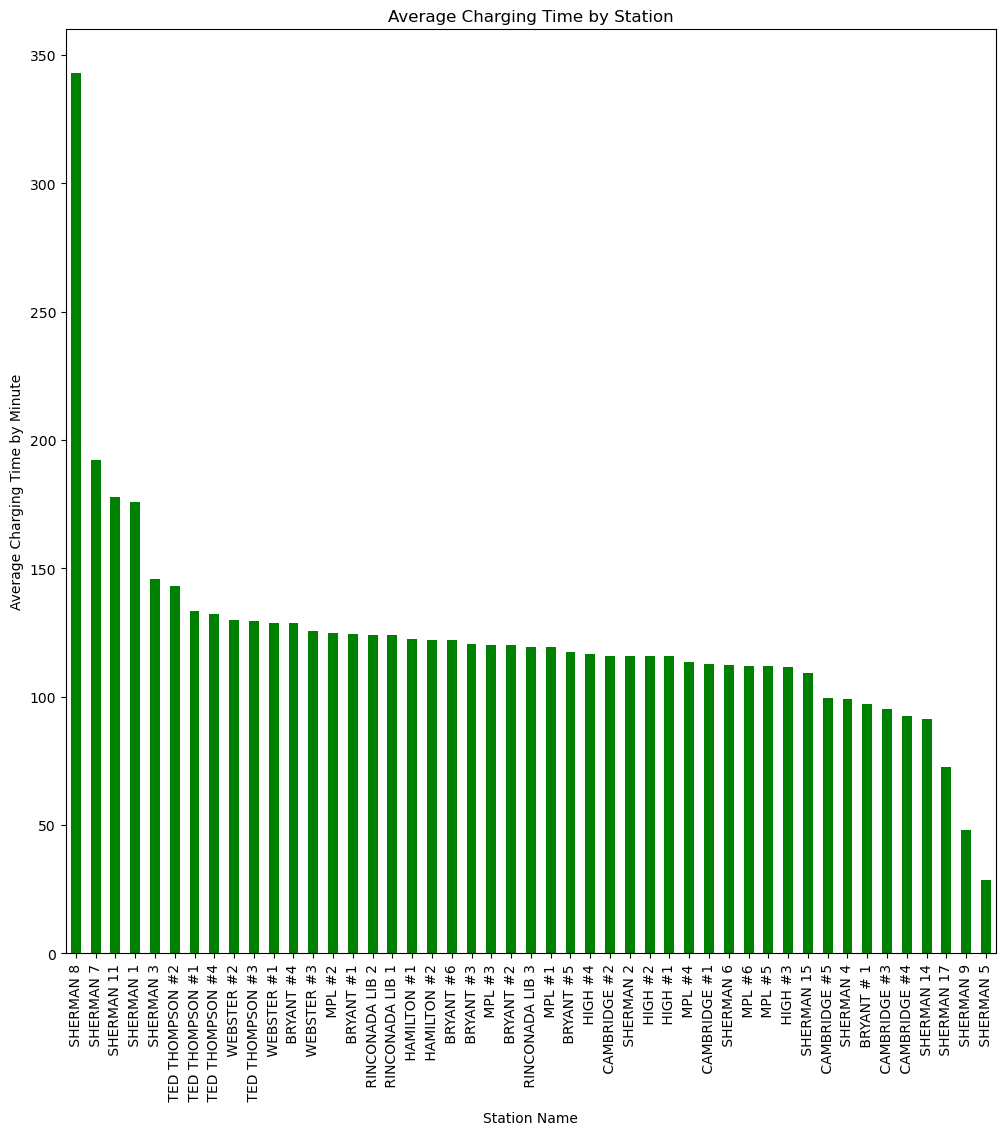

In [21]:
#create histogram to show 
plt.figure(figsize = (12,12))
avgPerStation = df.groupby('Station Name')['Charging Time'].mean()/60 #convert back to minute fore readablity
avgPerStations = avgPerStation.sort_values(ascending=False)
avgPerStations.plot(kind='bar', color='green')
plt.title('Average Charging Time by Station')
plt.xlabel('Station Name')
plt.ylabel('Average Charging Time by Minute')
plt.show()

Average time of Sherman 8 station is 342.808333 and address is 350 Sherman Ave.

In [22]:
df.columns



Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date',
       'Total Duration', 'Charging Time', 'Energy', 'GreenHouseGasSave',
       'Gasoline Savings', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID',
       'Address 1', 'City', 'Postal Code', 'Latitude', 'Longitude', 'Fee',
       'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID',
       'County', 'System S/N', 'Model Number', 'TimeAfterCharged'],
      dtype='object')

Dec 20 EDA process


In [34]:
df['Station Name'] = df['Station Name'].str.replace('BRYANT # 1', 'BRYANT #1')

In [38]:
df['Total_Amount_For_Charging']  = df['Fee'] * df['Charging Time']

In [39]:
df.groupby('Station Name')['Total_Amount_For_Charging'].sum()


Station Name
 BRYANT #1          4.728928e+07
 BRYANT #2          5.169818e+07
 BRYANT #3          4.863892e+07
 BRYANT #4          9.774737e+07
 BRYANT #5          1.249349e+08
 BRYANT #6          1.495086e+08
 CAMBRIDGE #1       1.289494e+08
 CAMBRIDGE #2       7.702849e+07
 CAMBRIDGE #3       7.540950e+07
 CAMBRIDGE #4       5.754512e+07
 CAMBRIDGE #5       9.685652e+07
 HAMILTON #1        7.791914e+07
 HAMILTON #2        2.182681e+08
 HIGH #1            9.865861e+07
 HIGH #2            1.226834e+08
 HIGH #3            1.433132e+08
 HIGH #4            8.803962e+07
 MPL #1             3.131044e+06
 MPL #2             6.068427e+06
 MPL #3             2.714048e+06
 MPL #4             8.252962e+07
 MPL #5             7.382637e+07
 MPL #6             9.327897e+07
 RINCONADA LIB 1    8.154246e+07
 RINCONADA LIB 2    7.195376e+07
 RINCONADA LIB 3    7.036678e+07
 SHERMAN 1          3.841790e+05
 SHERMAN 11         4.213860e+04
 SHERMAN 14         2.389140e+04
 SHERMAN 15         1.652364e+

Total charging fee accumulate over 9 years

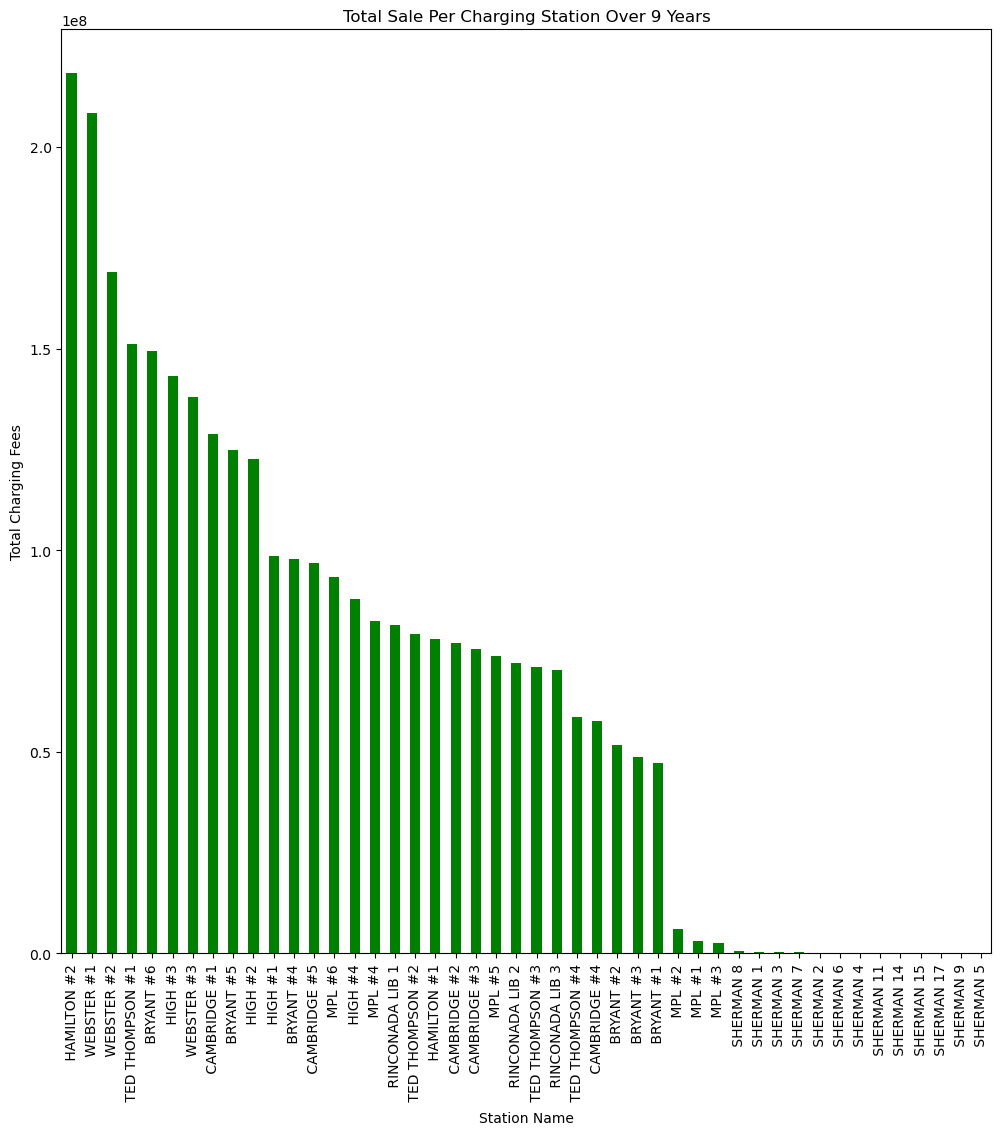

In [45]:
#create histogram and see which station has highest 
plt.figure(figsize=(12,12))
totalAmount = df.groupby('Station Name')['Total_Amount_For_Charging'].sum()
total_Amount = totalAmount.sort_values(ascending=False)
total_Amount.plot(kind='bar', color = 'green')
plt.title('Total Sale Per Charging Station Over 9 Years')
plt.xlabel('Station Name')
plt.ylabel('Total Charging Fees')
plt.show()


In [46]:
#plt.figure(figsize=(14,8))
#sns.regplot(x=df['Address 1'], y = df['GreenHouseGasSave'] )
#sns.despine()
#plt.title("Address 1 vs charging Time")


In [23]:
#Display column names and cunt with Nulls
print(df[df == np.inf].count())

Station Name          0
MAC Address           0
Org Name              0
Start Date            0
Start Time Zone       0
End Date              0
End Time Zone         0
Transaction Date      0
Total Duration        0
Charging Time         0
Energy                0
GreenHouseGasSave     0
Gasoline Savings      0
Port Type             0
Port Number           0
Plug Type             0
EVSE ID               0
Address 1             0
City                  0
Postal Code           0
Latitude              0
Longitude             0
Fee                   0
Ended By              0
Plug In Event Id      0
Driver Postal Code    0
User ID               0
County                0
System S/N            0
Model Number          0
TimeAfterCharged      0
dtype: int64


In [27]:
df['County'].value_counts()

County
Santa Clara County    147263
San Mateo County       27487
Name: count, dtype: int64

In [28]:
df['County'].isna().sum()

84665

In [30]:
df.groupby(['Station Name','Address 1'])['Fee'].sum()

Station Name  Address 1     
 BRYANT # 1   445 Bryant St        54.65
 BRYANT #1    445 Bryant St      4479.07
              Bryant St             0.00
 BRYANT #2    445 Bryant St      4990.83
              Bryant St             0.00
                                  ...   
 WEBSTER #2   520 Webster St    15571.17
              532 Webster St        0.00
 WEBSTER #3   520 Cowper St         0.00
              520 Webster St    13066.16
              533 Cowper St         0.00
Name: Fee, Length: 63, dtype: float64

In [47]:
#All the address location with free charging stations
df[df['Fee'] == 0]['Address 1'].unique()

array(['250 Hamilton Ave', '528 High St', 'Bryant St',
       '3700 Middlefield Rd', '1520 Walnut Dr', '1514 Walnut Dr',
       '500-532 Webster St', '532 Webster St', '275 Cambridge Ave',
       '400 Cambridge Ave', '445 Bryant St', '520 Webster St',
       '1213 Newell Rd', '528 high st', '528 High St.', '533 Cowper St',
       '520 Cowper St', '475 Cambridge Ave'], dtype=object)

In [48]:
df[df['Fee']== 0]['Fee'].count()

133538

In [49]:
df[df['Fee'] > 0]['Station Name'].unique()

array([' CAMBRIDGE #2', ' HAMILTON #2', ' WEBSTER #1', ' HAMILTON #1',
       ' HIGH #3', ' RINCONADA LIB 1', ' MPL #5', ' WEBSTER #3',
       ' BRYANT #3', ' BRYANT #6', ' TED THOMPSON #1', ' CAMBRIDGE #1',
       ' MPL #4', ' MPL #3', ' HIGH #2', ' HIGH #4', ' BRYANT #5',
       ' BRYANT #4', ' HIGH #1', ' BRYANT #2', ' RINCONADA LIB 2',
       ' RINCONADA LIB 3', ' MPL #6', ' BRYANT #1', ' WEBSTER #2',
       ' MPL #2', ' MPL #1', ' CAMBRIDGE #5', ' TED THOMPSON #3',
       ' TED THOMPSON #4', ' TED THOMPSON #2', ' CAMBRIDGE #3',
       ' CAMBRIDGE #4', ' SHERMAN 6', ' SHERMAN 7', ' SHERMAN 9',
       ' SHERMAN 8', ' SHERMAN 4', ' SHERMAN 1', ' SHERMAN 3',
       ' SHERMAN 14', ' SHERMAN 2', ' SHERMAN 5', ' SHERMAN 15',
       ' SHERMAN 11', ' SHERMAN 17'], dtype=object)

In [50]:
df['Driver Postal Code'].value_counts()

Driver Postal Code
94301.0    25032
94303.0    22561
94306.0    21573
94025.0    11581
94043.0     7541
           ...  
92630.0        1
47906.0        1
6830.0         1
93536.0        1
63301.0        1
Name: count, Length: 985, dtype: int64

Text(0.5, 1.0, 'Charging Station Postal Code vs Driver Postal Code')

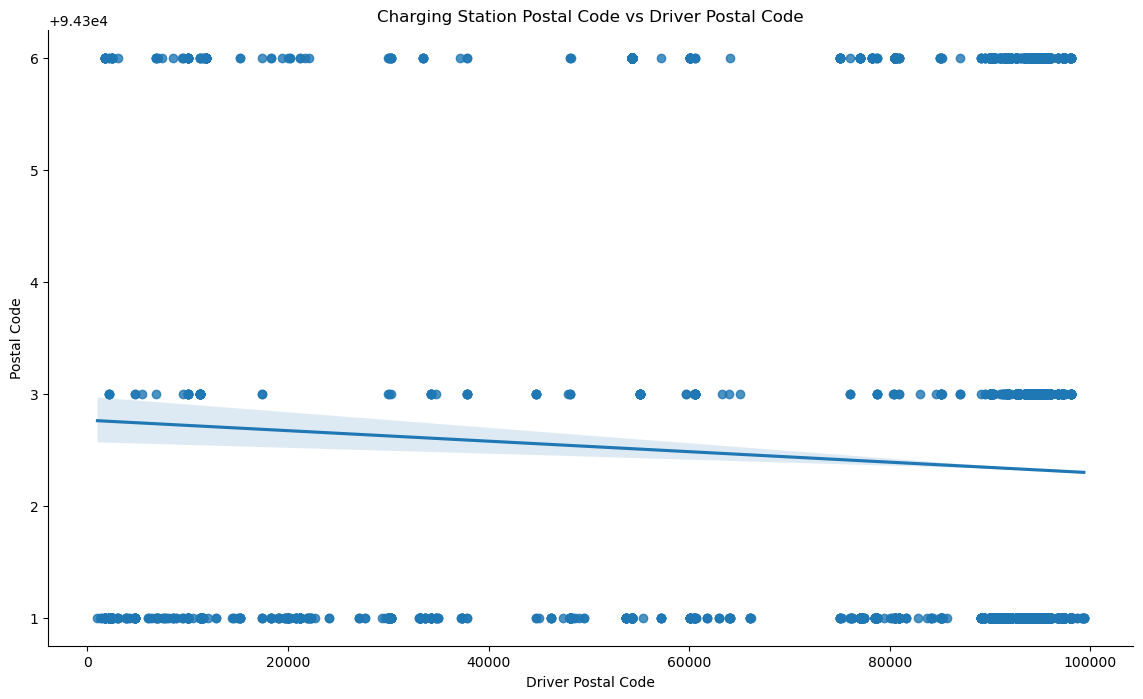

In [51]:
plt.figure(figsize=(14,8))
sns.regplot(x=df['Driver Postal Code'], y=df['Postal Code'])
sns.despine()
plt.title("Charging Station Postal Code vs Driver Postal Code")

Many NaN values on County 
Need to fill it up with actual county names

In [52]:
df['County'].value_counts()

County
Santa Clara County    147263
San Mateo County       27487
Name: count, dtype: int64

In [58]:
df['County'].isna().sum()

84665

There are 84665 NaN values in County column

In [64]:
# Create a map for county
#county_mapping = {
 # how to create and fill the map....
}

# Use the mapping to fill in NaN values in the 'County' column based on the 'Address' column
#df['County'] = df['Address 1'].map(county_mapping).fillna(df['County'])
